## Playing with Convolutions 

In [5]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

(3, 100, 100)

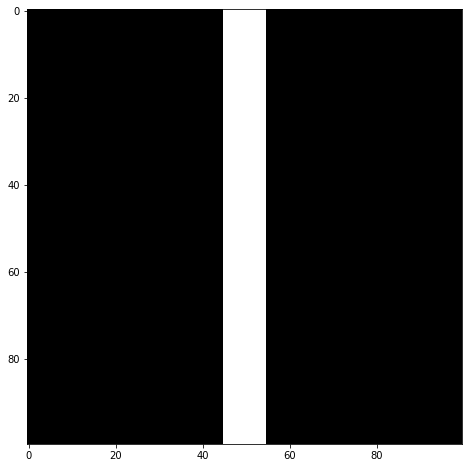

In [6]:
img = np.zeros((3,100,100))
img[:,:, 45:55] = 1
plt.figure(figsize = (8,8))
plt.imshow(np.transpose(img,(1,2,0)))
img.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


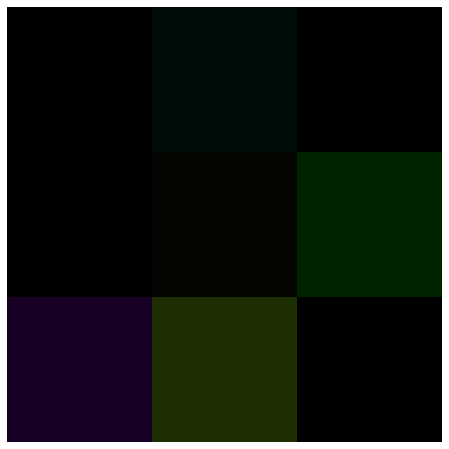

In [7]:
conv = nn.Conv2d(3,3,3, stride = 2)
plt.figure(figsize = (8,8))
plt.axis(False)
plt.imshow(conv.weight.detach().numpy()[0])

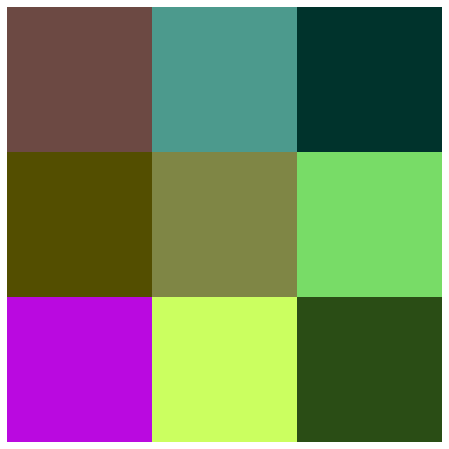

In [8]:
from torch.functional import norm
norm_weight = conv.weight.detach().numpy()[0]
norm_weight = (norm_weight - np.min(norm_weight)) / (np.max(norm_weight) - np.min(norm_weight))
plt.figure(figsize = (8,8))
plt.axis(False)
plt.imshow(norm_weight)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


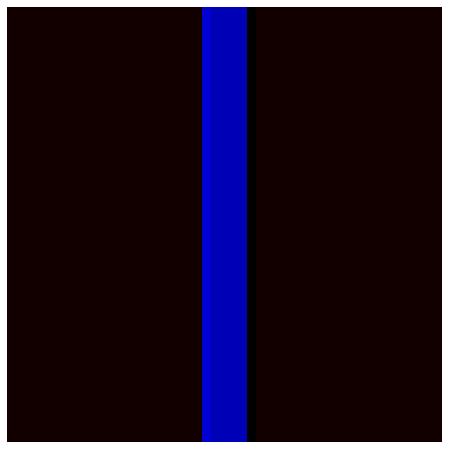

In [9]:
after_conv = conv(torch.Tensor(img))
plt.figure(figsize = (8,8))
plt.axis(False)
plt.imshow(after_conv.detach().numpy().transpose((1,2,0)))

In [10]:
conv.bias

Parameter containing:
tensor([ 0.0732, -0.1207, -0.0177], requires_grad=True)

In [11]:
img.shape

(3, 100, 100)

In [12]:
after_conv.shape

torch.Size([3, 49, 49])

In [13]:
after_conv[:,0,:]

tensor([[ 0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,
          0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,
          0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732, -0.3423, -0.5000,
         -0.5000, -0.5000, -0.5000, -0.0845,  0.0732,  0.0732,  0.0732,  0.0732,
          0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,
          0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,  0.0732,
          0.0732],
        [-0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207,
         -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207,
         -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.3259, -0.3538,
         -0.3538, -0.3538, -0.3538, -0.1486, -0.1207, -0.1207, -0.1207, -0.1207,
         -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207,
         -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207, -0.1207,
         

# **Cifar 10 classification model**

In [14]:
%%capture
!pip install torchvision

### Importing libraries

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

### Loading the dataset

In [16]:
tensor_transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = tensor_transform)
val_data = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = tensor_transform)

train_data, val_data

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [17]:
len(train_data)

50000

In [18]:
classes = {0: 'plane' ,1: 'car' ,2: 'bird' ,3: 'cat' ,4: 'deer' ,5: 'dog' ,6: 'frog' ,7: 'horse' ,8: 'ship', 9: 'truck'}

In [19]:
import numpy as np

np.asarray(train_data[0][0]).shape

(3, 32, 32)

In [20]:
tensor_transform = transforms.Compose(transforms.ToTensor())

In [21]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size = 4, shuffle = True)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size = 4, shuffle = False)

In [22]:
train_dataloader

In [23]:
train_iter = iter(train_dataloader)

In [24]:
images, labels = train_iter.next()

In [25]:
images.shape

torch.Size([4, 3, 32, 32])

In [26]:
images[0].shape

torch.Size([3, 32, 32])

In [27]:
labels

tensor([0, 0, 5, 7])

In [28]:
classes

{0: 'plane',
 1: 'car',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [29]:
import matplotlib.pyplot as plt

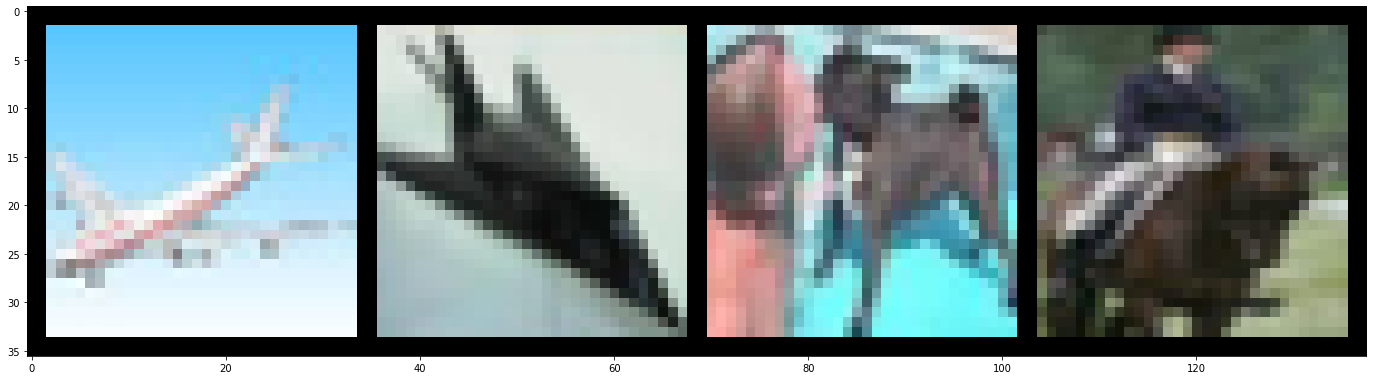

In [30]:
def imshow(img):
  np_im = img.numpy()
  plt.imshow(np.transpose(np_im, (1,2,0)))
  plt.show()

plt.figure(figsize = (24,12))
imshow(torchvision.utils.make_grid(images))

In [31]:
torchvision.utils.make_grid(images).numpy().shape

(3, 36, 138)

In [32]:
np.transpose(torchvision.utils.make_grid(images).numpy(), (1,2,0)).shape

(36, 138, 3)

## Model Architecture

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassifier(nn.Module):

  def __init__(self):
     # static image classifier
     super().__init__()
     self.conv1 = nn.Conv2d(3,6,5)
     self.pool = nn.MaxPool2d(2,2)
     self.conv2 = nn.Conv2d(6,16,5)
     self.fc1 = nn.Linear(16*5*5, 120)
     self.fc2 = nn.Linear(120, 84)
     self.fc3 = nn.Linear(84, 10)


  def forward(self, x):

    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    return self.fc3(x)

### Mode Training

In [34]:
import torch.optim as optim

classifier_model = ImageClassifier()
loss_function = nn.CrossEntropyLoss()
optimiser = optim.SGD(classifier_model.parameters(), lr = 0.001, momentum = 0.9)

In [35]:
classifier_model

ImageClassifier(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [37]:
for epoch in range(10):

  running_loss = 0.0

  for i, batch in enumerate(train_dataloader, 0):
      images, labels = batch
      optimiser.zero_grad()
      logits = classifier_model(images)
      loss = loss_function(logits, labels)
      loss.backward()
      optimiser.step()

      running_loss += loss.item()

      if i % 2000 == 1999:
        print(f'[{epoch + 1}, {i + 1:5}, loss {running_loss / 2000:.3f}]')
        running_loss = 0.0
  
print("finished Training")

[1,  2000, loss 1.214]
[1,  4000, loss 1.210]
[1,  6000, loss 1.199]
[1,  8000, loss 1.228]
[1, 10000, loss 1.224]
[1, 12000, loss 1.235]
[2,  2000, loss 1.164]
[2,  4000, loss 1.172]
[2,  6000, loss 1.183]
[2,  8000, loss 1.147]
[2, 10000, loss 1.163]
[2, 12000, loss 1.149]
[3,  2000, loss 1.095]
[3,  4000, loss 1.121]
[3,  6000, loss 1.108]
[3,  8000, loss 1.124]
[3, 10000, loss 1.114]
[3, 12000, loss 1.114]
[4,  2000, loss 1.053]
[4,  4000, loss 1.051]
[4,  6000, loss 1.071]
[4,  8000, loss 1.070]
[4, 10000, loss 1.069]
[4, 12000, loss 1.098]
[5,  2000, loss 1.007]
[5,  4000, loss 1.020]
[5,  6000, loss 1.022]
[5,  8000, loss 1.051]
[5, 10000, loss 1.058]
[5, 12000, loss 1.049]
[6,  2000, loss 0.962]
[6,  4000, loss 0.995]
[6,  6000, loss 1.004]
[6,  8000, loss 1.022]
[6, 10000, loss 1.019]
[6, 12000, loss 1.029]
[7,  2000, loss 0.951]
[7,  4000, loss 0.945]
[7,  6000, loss 0.974]
[7,  8000, loss 0.985]
[7, 10000, loss 0.983]
[7, 12000, loss 0.992]
[8,  2000, loss 0.909]
[8,  4000, 

## Evalution

In [39]:
correct = 0
total = 0

with torch.no_grad():
  for batch in val_dataloader:
    images, labels = batch
    logits = classifier_model(images)
    # 4*10

    _, predicted = torch.max(logits.data, 1)
    # 4*1
    total += labels.size(0)
    correct += (predicted == labels).sum().item()   

print(f'Accuracy over 10000 validation images : {100 * correct // total}%')

Accuracy over 10000 validation images : 57%
